In [1]:
#Un dataset

#necessaire : 
#modèle - fonction de cout - gradients - descente de gradient

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1 - Dataset

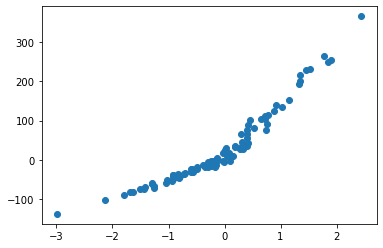

In [3]:
#génère un dataset depuis la librairie sklearn
x, y = make_regression(n_samples=100, n_features = 1, noise = 10)
y = y + abs(y/2)

# display du dataset : 
plt.scatter(x, y)

In [4]:
print(x.shape)
#par defaut les dimentions de y sont incomplètes "(100, )"
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [5]:
#matrice X
#hstack permet de fusionner deux matrices, ones génére une matrice constitué de 1 de dimension comme paramètre
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X.shape
X

array([[ 3.33700942e-01, -5.77668540e-01,  1.00000000e+00],
       [ 4.53269439e-02, -2.12901254e-01,  1.00000000e+00],
       [ 1.04097011e-01,  3.22640684e-01,  1.00000000e+00],
       [ 6.62777573e-01, -8.14111524e-01,  1.00000000e+00],
       [ 3.67317777e-01, -6.06067469e-01,  1.00000000e+00],
       [ 7.01267141e-01, -8.37416946e-01,  1.00000000e+00],
       [ 2.08229882e+00, -1.44301726e+00,  1.00000000e+00],
       [ 1.16489096e-04, -1.07930114e-02,  1.00000000e+00],
       [ 1.57987552e+00, -1.25693099e+00,  1.00000000e+00],
       [ 2.85578333e+00, -1.68990631e+00,  1.00000000e+00],
       [ 8.43337381e-01, -9.18334025e-01,  1.00000000e+00],
       [ 1.71988844e-01,  4.14715377e-01,  1.00000000e+00],
       [ 2.26714784e+00, -1.50570510e+00,  1.00000000e+00],
       [ 8.44210043e-02, -2.90552929e-01,  1.00000000e+00],
       [ 1.88287293e-03,  4.33920837e-02,  1.00000000e+00],
       [ 8.54728057e-02, -2.92357325e-01,  1.00000000e+00],
       [ 1.15956925e-03, -3.40524486e-02

In [6]:
theta = np.random.randn(3, 1)
theta

array([[-0.25942707],
       [-0.4391879 ],
       [ 0.16224192]])

# 2 - Modèle

In [7]:
#modèle linéaire donc notre fonction doit être de la forme X.theta ainsi elle doit simplement retourner le produit matricielle
def model(X, theta):
    return X.dot(theta) #permet de faire le produit matricielle de X par theta

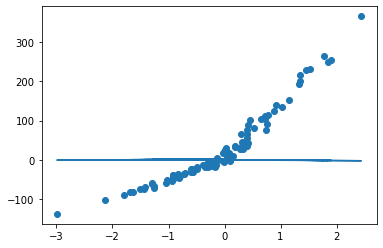

In [8]:
#tester le modèle
plt.scatter(x, y)
plt.plot(x, model(X, theta))
#courbe mauvaise

# 3 - Fonction cout

In [9]:
#Fonction cout est l'erreur quadratique moyenne : "1/2m * sum(X.theta - y)**2"
#m designe le nb de pts dans le data set, m = len(y)
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [10]:
cost_function(X, y, theta)

4447.803837054326

# 4 - Gradient & Descente de Gradient

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [12]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

# 5 - Entrainement du modèle

In [13]:
theta_final = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [14]:
theta_final

array([[19.25173894],
       [97.23592665],
       [19.12491234]])

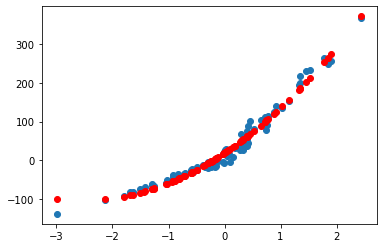

In [15]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

# BILAN : la courbe obtenue est desormais satisfaisante

# 6 - Comment tracer la minimisation avec la fonction cout
# La machine apprend elle bien ?

In [16]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [17]:
theta_final, cost_history = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

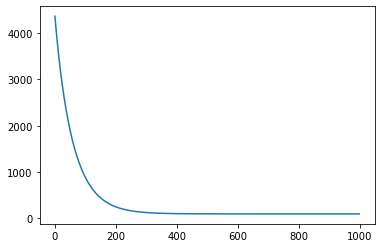

In [18]:
#Affiche l'évolution de la minimisation en fonction du nb d'itérations
plt.plot(range(1000), cost_history)

# 7 - Coefficient de determination | afficher les performance du modèle

In [19]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [20]:
coef_determination(y, predictions)

0.9780975761687665